In [9]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from frame_collection import *
import seaborn as sns; sns.set()
import pandas as pd

# loading data from google drive
# NOTE: force remount takes some time
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

# data folder location
HMDB_DATA = 'drive/My Drive/Computer Vision/HMDB/hmdb51_org/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
video_files = get_videos_and_labels()

Getting video file paths...
Found 6802 files


In [0]:
test_video = video_files['punch'][50]

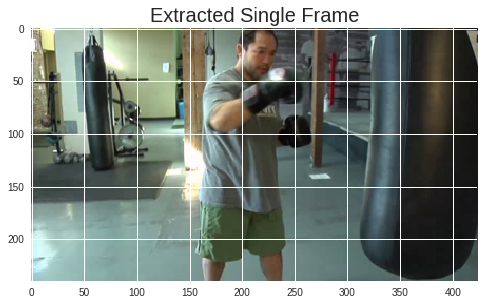

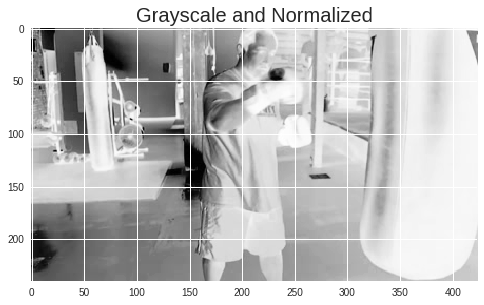

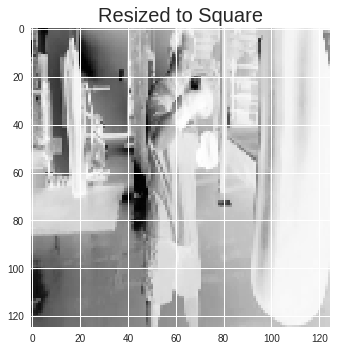

In [6]:
cap = cv2.VideoCapture(test_video)
ret, frame = cap.read()
frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frameGscl = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frameSq = cv2.resize(frameGscl, (125, 125))

plt.figure(); plt.title('Extracted Single Frame', fontsize=20)
plt.imshow(frameRGB)
plt.figure(); plt.title('Grayscale and Normalized', fontsize=20)
plt.imshow(frameGscl)
plt.figure(); plt.title('Resized to Square', fontsize=20)
plt.imshow(frameSq)
plt.show()

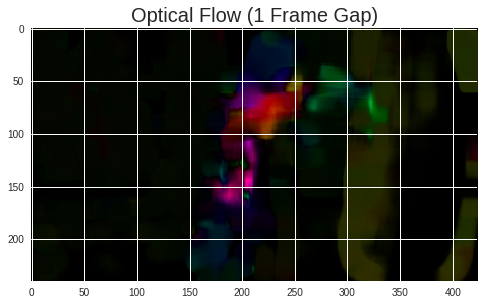

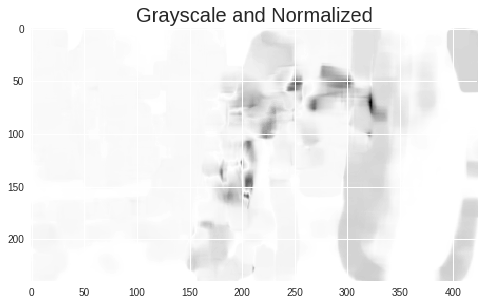

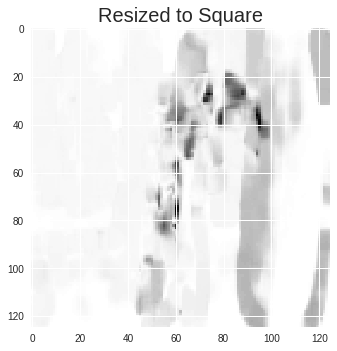

In [8]:
cap = cv2.VideoCapture(test_video)

cap.set(cv2.CAP_PROP_POS_FRAMES, 20)

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

cap.set(cv2.CAP_PROP_POS_FRAMES, 22)

ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
rgbGscl = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
rgbResize = cv2.resize(rgbGscl, (125, 125))

plt.figure(); plt.title('Optical Flow (1 Frame Gap)', fontsize=20)
plt.imshow(rgb)
plt.figure(); plt.title('Grayscale and Normalized', fontsize=20)
plt.imshow(rgbGscl)
plt.figure(); plt.title('Resized to Square', fontsize=20)
plt.imshow(rgbResize)
plt.show()

In [11]:
# index = pd.date_range("1 1 2000", periods=100,freq="m", name="date")
# data = np.random.randn(100, 4).cumsum(axis=0)
# wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
# ax = sns.lineplot(data=wide_df)

AttributeError: ignored